# US VISA PREDICTION

## **Life cycle of Machine Learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory Data Analysis [EDA]
* Data Cleaning
* Data Preprocessing
* Model Training
* Choose Best Model


# About

The immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US worker against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the office of Foreign Labor Certification (OFLC).

# 1) Problem Statement

* OFLC gives job certification applications for employers seeking to bring foreign workers in the United States and grants certification.
* As in last year the count of employees were huge so OFLC needs Machine Learning models to shortlist visa applicants based on their previous data.

#### In this project we are going to use the data given to build a Classification Model:
* This model is to check if visa get approved or not based on the given dataset.
* This can be used

# 2) Data Collection

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Import the csv data as Pandas Dataframe
df = pd.read_csv('Visadataset.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# 3) Exploratory Data Analysis [EDA]

In [6]:
# Seperate Out Numerical and Categorical columns
target = df["case_status"]
numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].dtypes != "O":
        numerical_features.append(col)
    else:
        categorical_features.append(col)

print(f"we have {len(numerical_features)} numerical features: {numerical_features}")
print()
print(f"we have {len(categorical_features)} categorical features: {categorical_features}")

we have 3 numerical features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

we have 9 categorical features: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# proportion of count data on categorical columns:
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("-----------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

* `case_id`: have unique values for each columns which can be dropped as it has no importance
* `continent`:column is highly biased towards "Asia". Hence we can combine other categories to form single category.
* `unit of wage`: It seems to be an important column as most of them are yearly contract.


# Univariate Analysis

## Numerical Variables

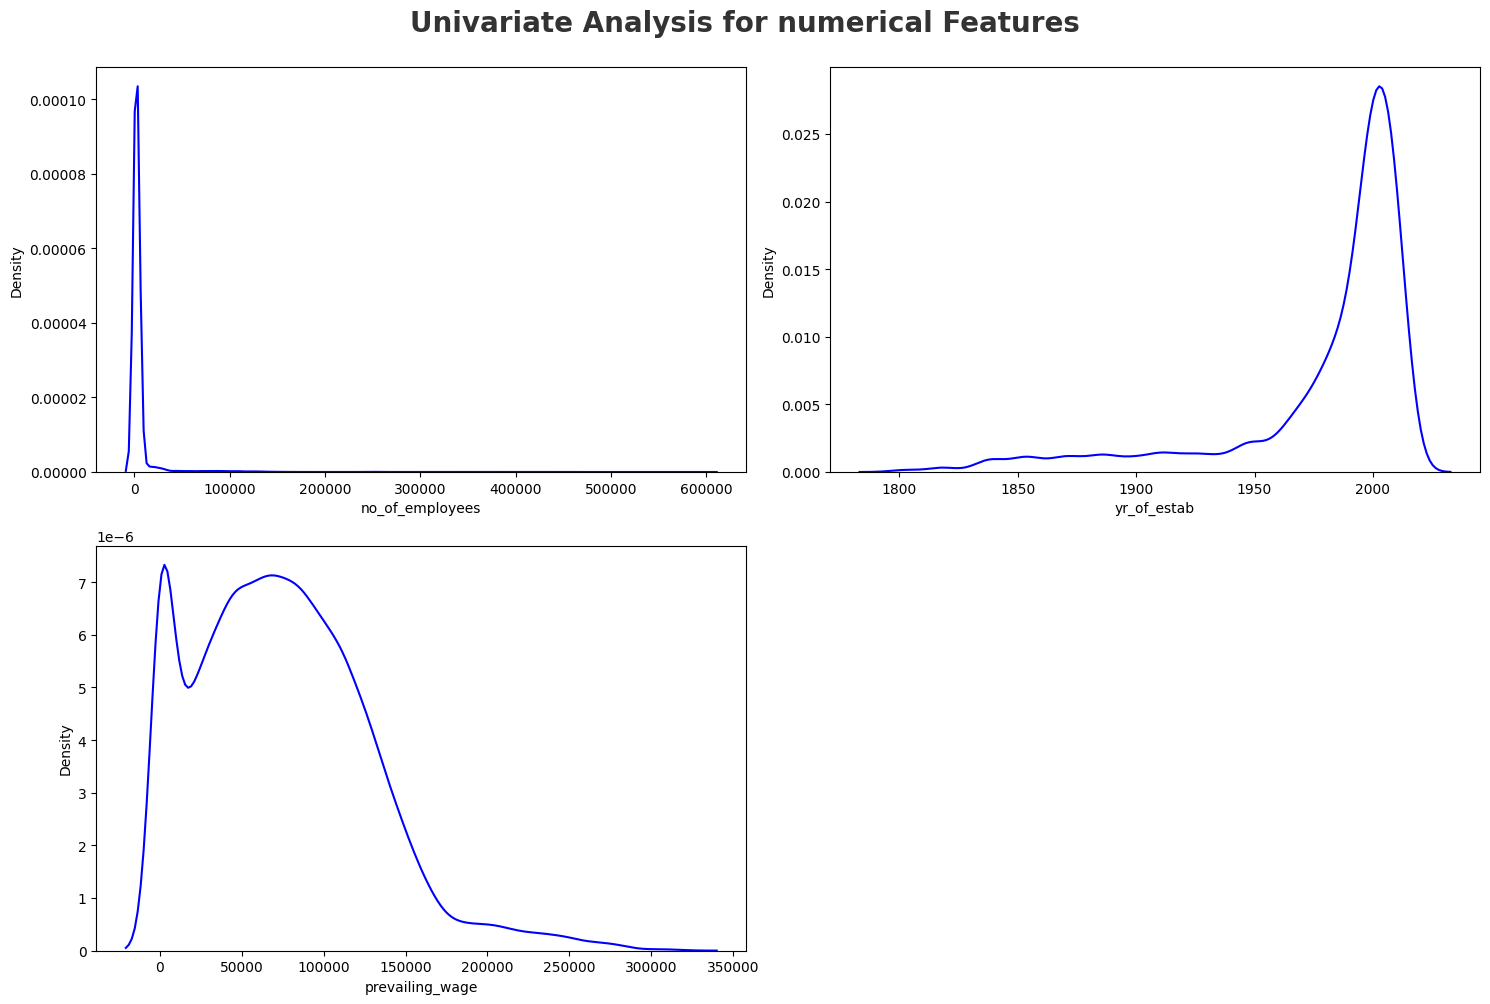

In [8]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis for numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    


#### Insights

* `no_of_employees`:columns looks more skewed but it may be because of outliers.
* `yrs_of_establishment`: is a discreate feature.
* `prevaling wages` is a right skewed distribution.

## Categorical_ Features

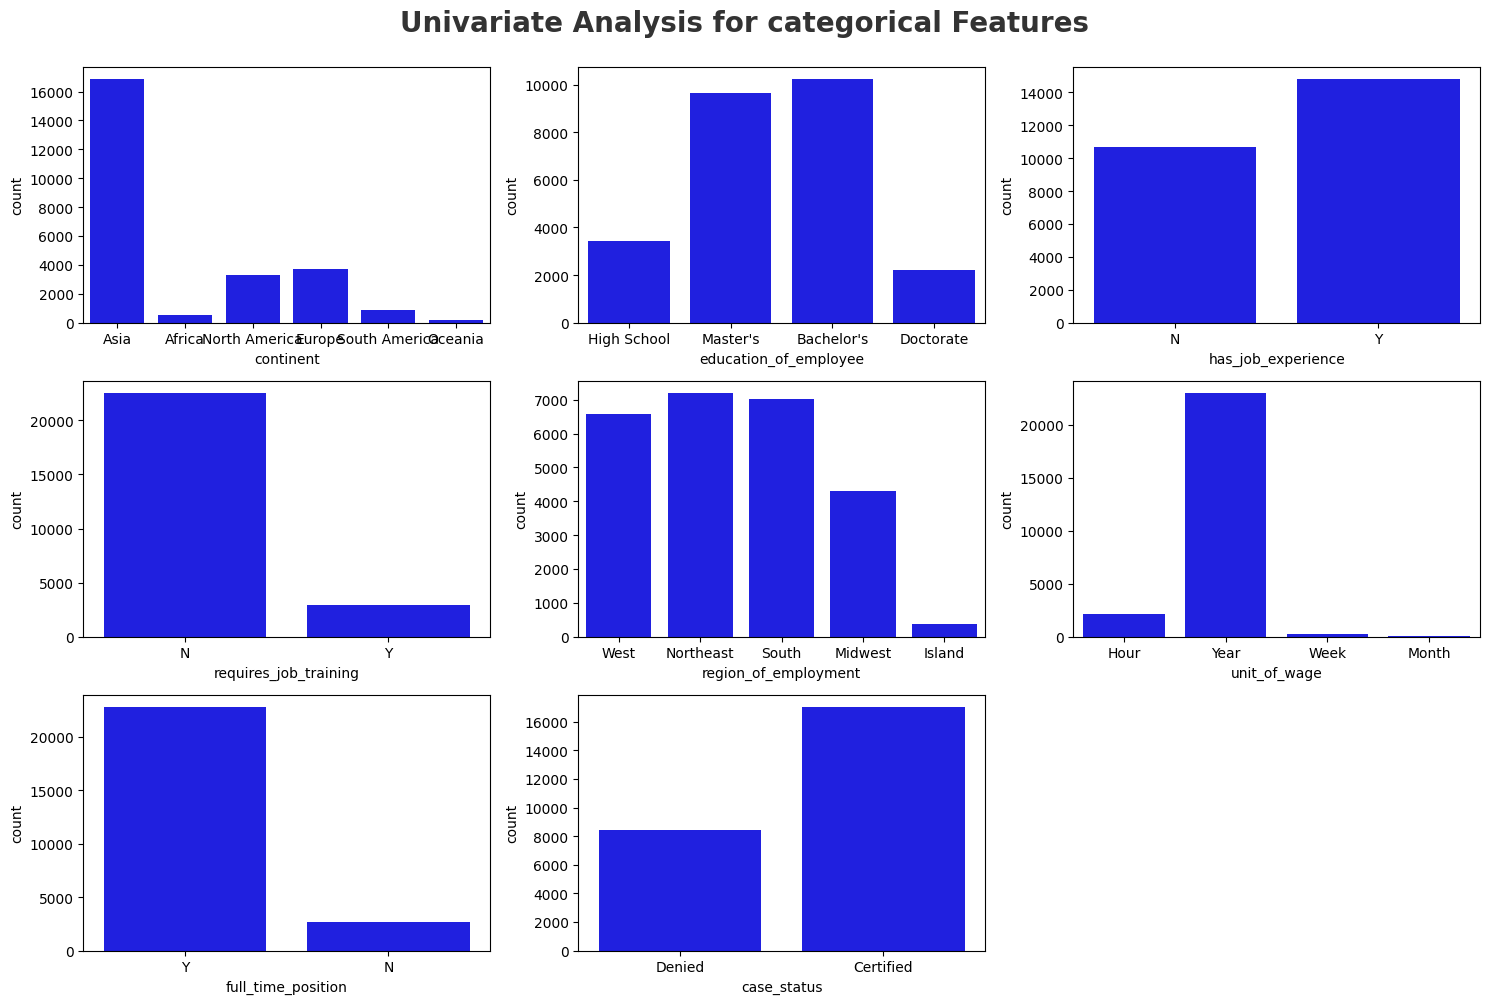

In [9]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,10))
plt.suptitle("Univariate Analysis for categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]],color='blue')
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

### Insights
* `full_time_position`, `requires_job_training`, `unit of wages` and `continents`: These columns have a single category dominating.
* Rest of the columns are balanced.

# Multivariate Analysis

* Multivariate analysis is an analysis of more than one variable.

In [10]:
discrete_features = []
continious_features = []

for col in numerical_features:
    if len(df[col].unique()) <= 25:
        discrete_features.append(col)
    else:
        continious_features.append(col)

print(f"We have {len(discrete_features)} discrete features: {discrete_features}")
print(f"We have {len(continious_features)} continious features: {continious_features}")


We have 0 discrete features: []
We have 3 continious features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


## Check multicolinearity for categorical features
* A chi-squared test is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson chi-squared test.
* A chi-square statistic is one way to show relationship between two categorical variables.
* Here we test corellation of categorical variable with Target column i.e `case_status`

Null Hypothesis (H0): The feature is independent of target column (No-Correlation)
Alternative Hypothesis: The feature and target column are not Corelated.

In [11]:
from scipy.stats import chi2_contingency

chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Faied to Reject Null Hypothesis")

results = pd.DataFrame(data=[categorical_features,chi2_test]).T
results.columns = ["Columns","Hypothesis Results"]
results

,Columns,Hypothesis Results
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Faied to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**`requires_job_training`** fails to Reject Null Hypothesis which means it doesn't correlated with the target columns

In [12]:
# Checking null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

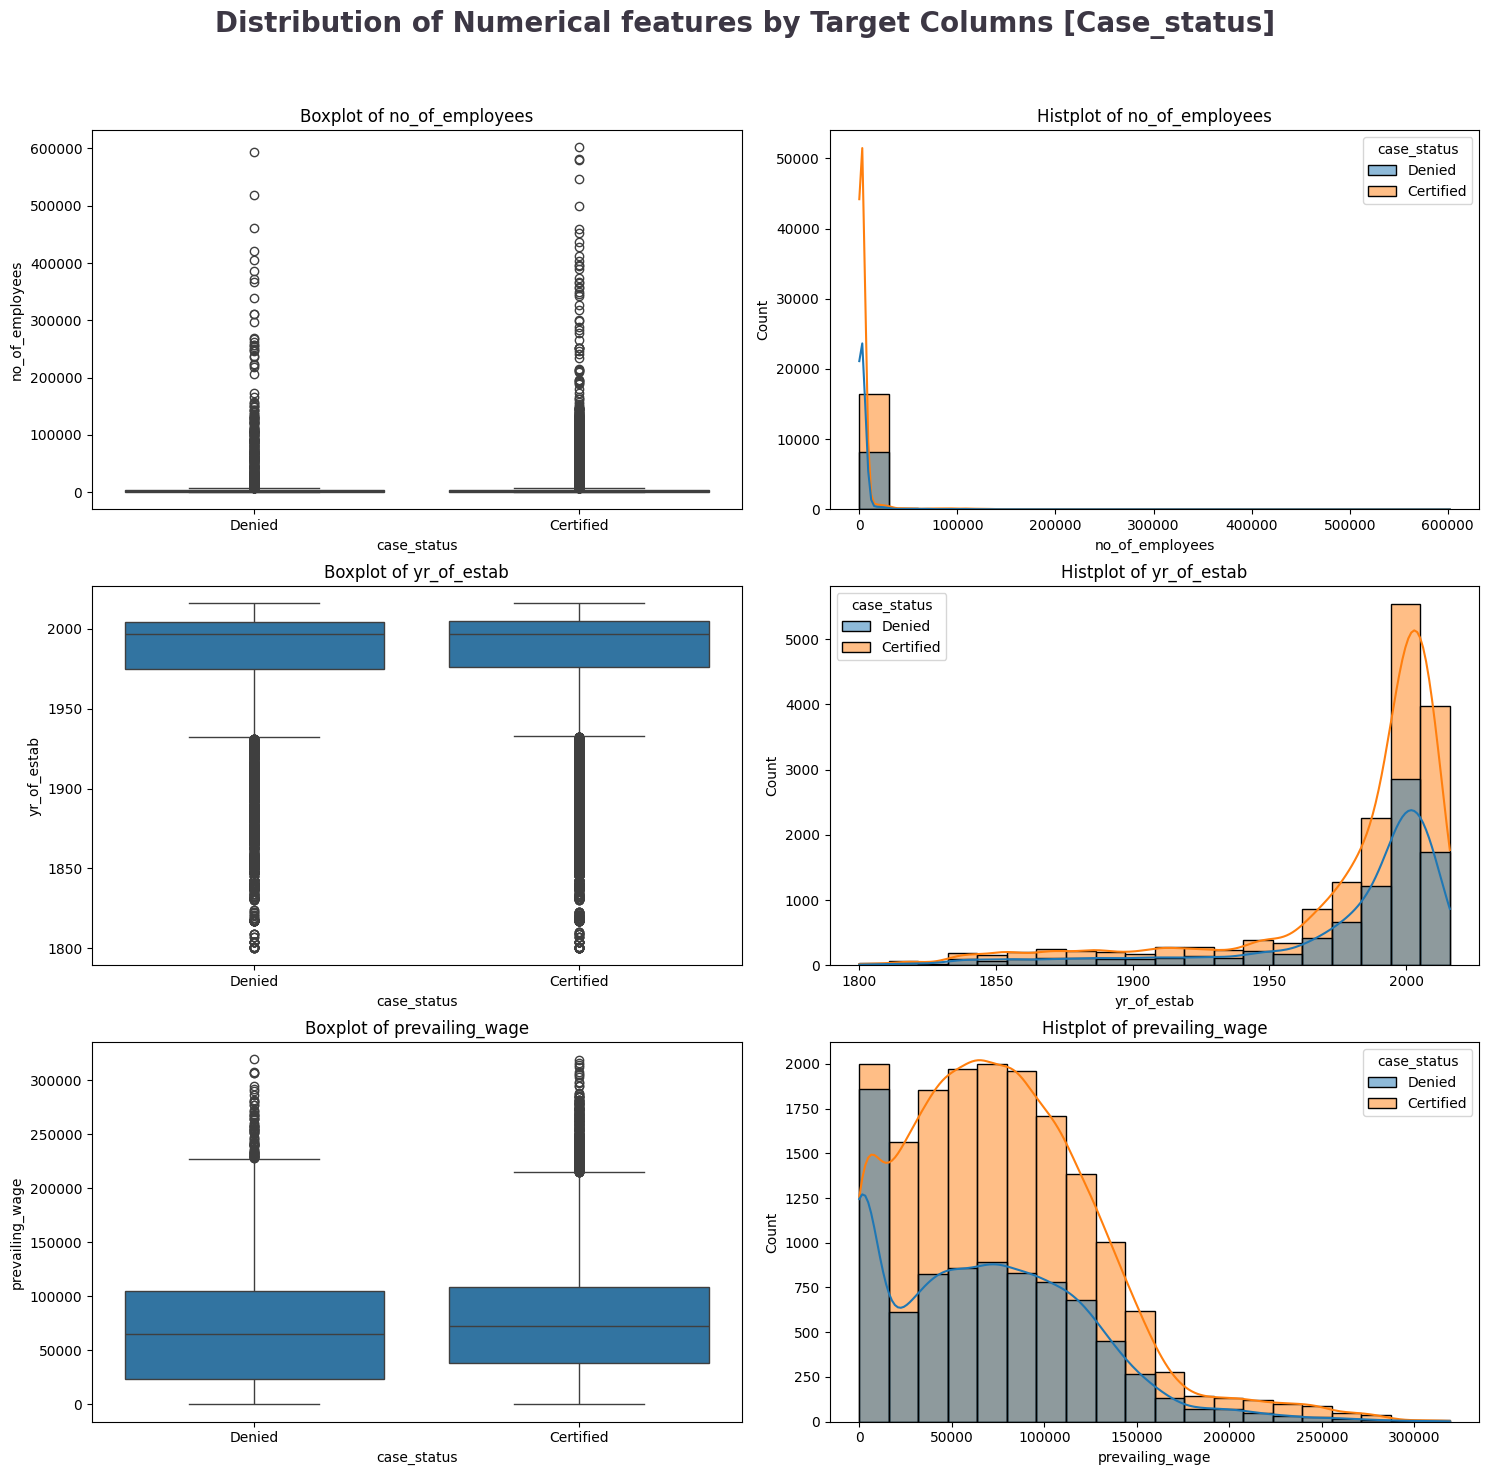

In [13]:
fig,ax = plt.subplots(3,2,figsize=(15,15))
fig.suptitle("Distribution of Numerical features by Target Columns [Case_status]",color = '#3c3744',fontsize = 20, fontweight='bold', ha = 'center')

for i,col in enumerate(continious_features):
    sns.boxplot(data=df, x="case_status",y=col,ax=ax[i,0])
    ax[i,0].set_title(f"Boxplot of {col}", fontsize=12)
    sns.histplot(data=df,x=col,hue='case_status',ax=ax[i,1],bins=20,kde=True)
    ax[i,1].set_title(f"Histplot of {col}", fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.9)

In [14]:
for i,col in enumerate(continious_features):
    print(i,col)

0 no_of_employees
1 yr_of_estab
2 prevailing_wage


## Initial Analysis Report.
* **`no_of_employees`**: Is right skewed and has many outliers which can be handeled in Feature Engineering.
* **`yr_of_estab`** : Is left skewed and some of the outliers are below the lower bound.
* **`prevailing_wage`**: Is right skewed and has many outliers are on the upper bound.
* Three is **`NO MISSING`** values in the dataset.
* The **`case_id`** has to be deleted since it has all unique data.
* The **`case_status`** column is the target to predict.
* In categorical columns feature can be made binary numerical if feature encoding.

## Does applicant continent has any impact on Visa status

In [15]:
df.groupby('continent')['case_status'].value_counts(normalize=True)*100

continent      case_status
Africa         Certified      72.050817
               Denied         27.949183
Asia           Certified      65.310480
               Denied         34.689520
Europe         Certified      79.233655
               Denied         20.766345
North America  Certified      61.877278
               Denied         38.122722
Oceania        Certified      63.541667
               Denied         36.458333
South America  Certified      57.863850
               Denied         42.136150
Name: proportion, dtype: float64

### Plotting of the above data.

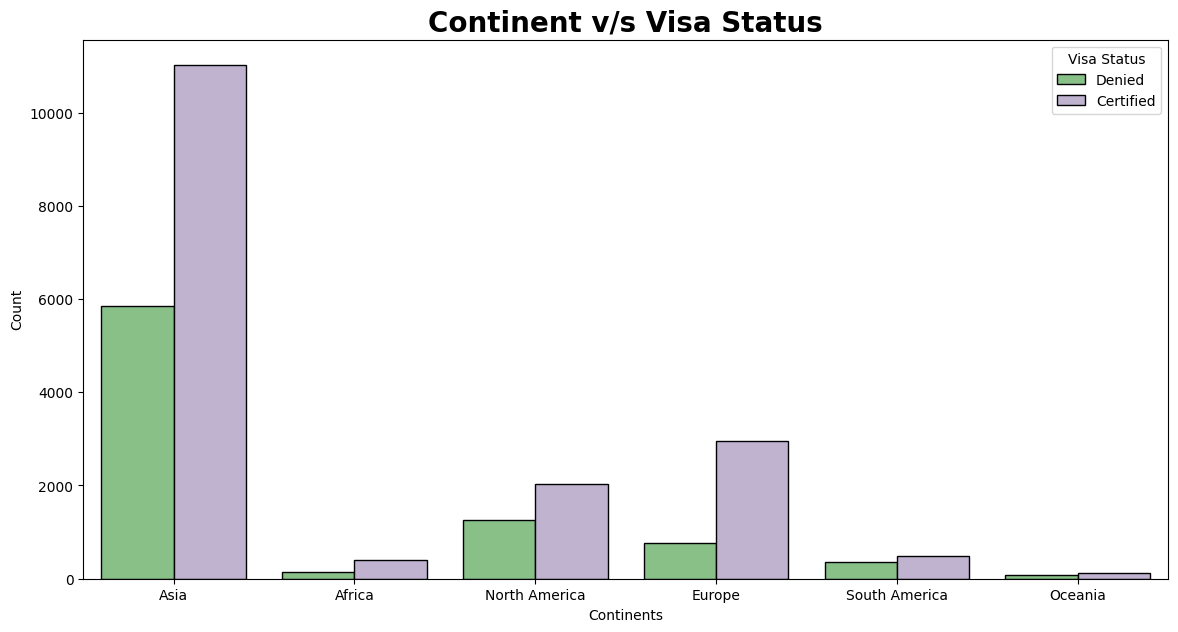

In [16]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df['continent'],hue=df['case_status'],ec="black",palette="Accent")
plt.title("Continent v/s Visa Status",fontweight='bold',fontsize=20)
plt.ylabel("Count")
plt.xlabel("Continents")
plt.legend(title="Visa Status")
plt.show()

### Does applicant education has any impact on Visa Status?

In [17]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True)*100

education_of_employee  case_status
Bachelor's             Certified      62.214188
                       Denied         37.785812
Doctorate              Certified      87.226277
                       Denied         12.773723
High School            Denied         65.964912
                       Certified      34.035088
Master's               Certified      78.627777
                       Denied         21.372223
Name: proportion, dtype: float64